In [1]:
import pandas as pd
from torch.utils.data import DataLoader
import pytorch_lightning as pl
#from pytorch_lightning.profiler import Profiler, AdvancedProfiler
import HeatfluxData as hfd
import HeatfluxModel as hfm

/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename_data = f'scaled_QdataKn21width100microns.csv'
# NOTE: if the filename_data does not exist generate it by `python3 generate_QimpactTrainingData.py 100 0.01 0.2 40000 105`
# Using heat flux data module
scaled_Qdata = pd.read_csv(filename_data, header=0, index_col=0)
dropouts = ['x']; Nfields = 6 - len(dropouts) # T, gradT, Z, n, Kn, x
test_split = 0.5
train_split = 0.8
test_set, train_set, validation_set, vis_set = hfd.heat_flux_datasets(scaled_Qdata, test_split, train_split, dropouts)

Dropping x_0
Dropping x_1
Dropping x_2
Dropping x_3
Dropping x_4
Dropping x_5
Dropping x_6
Dropping x_7
Dropping x_8
Dropping x_9
Dropping x_10
Dropping x_11
Dropping x_12
Dropping x_13
Dropping x_14
Dropping x_15
Dropping x_16
Dropping x_17
Dropping x_18
Dropping x_19
Dropping x_20


In [3]:
### Create data loaders
train_loader = DataLoader(dataset = train_set, batch_size = 128)
validation_loader = DataLoader(dataset = validation_set, batch_size = 128)
test_loader = DataLoader(dataset = test_set, batch_size = 128)
# Special object for visualization
vis_loader = DataLoader(dataset = vis_set, batch_size = 128)

In [4]:
### Read data sacling (generated by the data manager)
data_scaling=pd.read_csv(f'data_scaling.csv', header=0, index_col=0)

In [5]:
#### Create the heat flux model
Nfeatures = train_set[0][0].size()[0]# TODO: find a better way than extracting the size via Tensor
print(f'Nfeatures {Nfeatures}')
Nlayer1 = 30
Nlayer2 = 20
model = hfm.DirectModel(Nfeatures, Nlayer1, Nlayer2, data_scaling, Nfields)

Nfeatures 105


In [6]:
### Let's train the beast!
trainer = pl.Trainer(max_epochs = 100)
trainer.fit(model, train_loader, validation_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name     | Type    | Params
-------------------------------------
0 | fc1      | Linear  | 3.2 K 
1 | fc2      | Linear  | 620   
2 | fc3      | Linear  | 42    
3 | mse_loss | MSELoss | 0     
-------------------------------------
3.8 K     Trainable params
0         Non-trainable params
3.8 K     Total params
0.015     Total estimated model params size (MB)


/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/usr/workspace/mlmfem/anaconda3/envs/ptl_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  80%|██████████████████▎    | 119/149 [00:00<00:00, 189.51it/s, loss=0.0923, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 1:  80%|██████████████████▎    | 119/149 [00:00<00:00, 210.79it/s, loss=0.0404, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 2:  80%|███████████████████▏    | 119/149 [00:00<00:00, 205.94it/s, loss=0.027, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 2:  87%|████████████████████▉   | 130/149 [00:00<00:00, 207.64it/s, loss=0.027, v_num=109]


Epoch 3:  80%|██████████████████▎    | 119/149 [00:00<00:00, 212.27it/s, loss=0.0199, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 4:  80%|██████████████████▎    | 119/149 [00:00<00:00, 209.20it/s, loss=0.0154, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 4:  97%|██████████████████████▍| 145/149 [00:00<00:00, 214.42it/s, loss=0.0154, v_num=109]


Epoch 5:  80%|██████████████████▎    | 119/149 [00:00<00:00, 209.07it/s, loss=0.0125, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 6:  80%|██████████████████▎    | 119/149 [00:00<00:00, 207.28it/s, loss=0.0103, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 7:  80%|█████████████████▌    | 119/149 [00:00<00:00, 208.71it/s, loss=0.00863, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 7:  85%|██████████████████▌   | 126/149 [00:00<00:00, 208.37it/s, loss=0.00863, v_num=109]


Epoch 8:  80%|██████████████████▎    | 119/149 [00:00<00:00, 220.61it/s, loss=0.0074, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 9:  80%|█████████████████▌    | 119/149 [00:00<00:00, 221.32it/s, loss=0.00636, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 9:  95%|████████████████████▊ | 141/149 [00:00<00:00, 223.40it/s, loss=0.00636, v_num=109]


Epoch 10:  80%|████████████████▊    | 119/149 [00:00<00:00, 211.63it/s, loss=0.00552, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 11:  80%|████████████████▊    | 119/149 [00:00<00:00, 211.38it/s, loss=0.00485, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 12:  80%|████████████████▊    | 119/149 [00:00<00:00, 216.04it/s, loss=0.00429, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 12:  82%|█████████████████▏   | 122/149 [00:00<00:00, 214.64it/s, loss=0.00429, v_num=109]


Epoch 13:  80%|████████████████▊    | 119/149 [00:00<00:00, 216.86it/s, loss=0.00381, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 14:  80%|████████████████▊    | 119/149 [00:00<00:00, 224.70it/s, loss=0.00341, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 14:  92%|███████████████████▎ | 137/149 [00:00<00:00, 228.78it/s, loss=0.00341, v_num=109]


Epoch 15:  80%|████████████████▊    | 119/149 [00:00<00:00, 236.56it/s, loss=0.00307, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 16:  80%|████████████████▊    | 119/149 [00:00<00:00, 236.78it/s, loss=0.00278, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 17:  80%|████████████████▊    | 119/149 [00:00<00:00, 236.11it/s, loss=0.00252, v_num=109]
Validation: 0it [00:00, ?it/s]
Validation:   0%|                                                        | 0/30 [00:00<?, ?it/s]


Epoch 18:  80%|████████████████▊    | 119/149 [00:00<00:00, 236.52it/s, loss=0.00229, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 19:  80%|████████████████▊    | 119/149 [00:00<00:00, 220.81it/s, loss=0.00209, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 19:  89%|██████████████████▋  | 133/149 [00:00<00:00, 221.52it/s, loss=0.00209, v_num=109]


Epoch 20:  80%|████████████████▊    | 119/149 [00:00<00:00, 220.54it/s, loss=0.00192, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 21:  80%|████████████████▊    | 119/149 [00:00<00:00, 220.51it/s, loss=0.00177, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 21:  99%|████████████████████▊| 148/149 [00:00<00:00, 225.04it/s, loss=0.00177, v_num=109]


Epoch 22:  80%|████████████████▊    | 119/149 [00:00<00:00, 220.60it/s, loss=0.00164, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 23:  80%|████████████████▊    | 119/149 [00:00<00:00, 219.40it/s, loss=0.00153, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 24:  80%|████████████████▊    | 119/149 [00:00<00:00, 220.08it/s, loss=0.00143, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 24:  87%|██████████████████▏  | 129/149 [00:00<00:00, 219.87it/s, loss=0.00143, v_num=109]


Epoch 25:  80%|████████████████▊    | 119/149 [00:00<00:00, 235.47it/s, loss=0.00134, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 26:  80%|████████████████▊    | 119/149 [00:00<00:00, 222.11it/s, loss=0.00127, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 26:  97%|████████████████████▎| 144/149 [00:00<00:00, 223.94it/s, loss=0.00127, v_num=109]


Epoch 27:  80%|█████████████████▌    | 119/149 [00:00<00:00, 219.37it/s, loss=0.0012, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 28:  80%|████████████████▊    | 119/149 [00:00<00:00, 221.63it/s, loss=0.00114, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 29:  80%|████████████████▊    | 119/149 [00:00<00:00, 220.40it/s, loss=0.00108, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 29:  84%|█████████████████▌   | 125/149 [00:00<00:00, 219.37it/s, loss=0.00108, v_num=109]


Epoch 30:  80%|████████████████▊    | 119/149 [00:00<00:00, 220.32it/s, loss=0.00103, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 31:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.88it/s, loss=0.000987, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 31:  94%|██████████████████▊ | 140/149 [00:00<00:00, 223.53it/s, loss=0.000987, v_num=109]


Epoch 32:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.85it/s, loss=0.000947, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 33:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.64it/s, loss=0.000911, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 34:  80%|███████████████▉    | 119/149 [00:00<00:00, 221.97it/s, loss=0.000877, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 34:  81%|████████████████▏   | 121/149 [00:00<00:00, 220.23it/s, loss=0.000877, v_num=109]


Epoch 35:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.46it/s, loss=0.000847, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 36:  80%|████████████████▊    | 119/149 [00:00<00:00, 220.36it/s, loss=0.00082, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 36:  91%|███████████████████▏ | 136/149 [00:00<00:00, 221.44it/s, loss=0.00082, v_num=109]


Epoch 37:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.87it/s, loss=0.000795, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 38:  80%|███████████████▉    | 119/149 [00:00<00:00, 221.23it/s, loss=0.000772, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 39:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.26it/s, loss=0.000751, v_num=109]
Validation: 0it [00:00, ?it/s]


Epoch 40:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.32it/s, loss=0.000732, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 41:  80%|███████████████▉    | 119/149 [00:00<00:00, 218.60it/s, loss=0.000714, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 41:  89%|█████████████████▋  | 132/149 [00:00<00:00, 218.70it/s, loss=0.000714, v_num=109]


Epoch 42:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.23it/s, loss=0.000697, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 43:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.86it/s, loss=0.000682, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 43:  99%|███████████████████▋| 147/149 [00:00<00:00, 222.02it/s, loss=0.000682, v_num=109]


Epoch 44:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.21it/s, loss=0.000668, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 45:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.30it/s, loss=0.000655, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 46:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.88it/s, loss=0.000643, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 46:  86%|█████████████████▏  | 128/149 [00:00<00:00, 219.63it/s, loss=0.000643, v_num=109]


Epoch 47:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.35it/s, loss=0.000632, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 48:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.85it/s, loss=0.000621, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 48:  96%|███████████████████▏| 143/149 [00:00<00:00, 221.68it/s, loss=0.000621, v_num=109]


Epoch 49:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.87it/s, loss=0.000612, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 50:  80%|███████████████▉    | 119/149 [00:00<00:00, 218.76it/s, loss=0.000603, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 51:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.20it/s, loss=0.000594, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 51:  83%|████████████████▋   | 124/149 [00:00<00:00, 219.16it/s, loss=0.000594, v_num=109]


Epoch 52:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.03it/s, loss=0.000586, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 53:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.18it/s, loss=0.000579, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 53:  93%|██████████████████▋ | 139/149 [00:00<00:00, 220.84it/s, loss=0.000579, v_num=109]


Epoch 54:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.75it/s, loss=0.000572, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 55:  80%|███████████████▉    | 119/149 [00:00<00:00, 233.11it/s, loss=0.000566, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 56:  80%|████████████████▊    | 119/149 [00:00<00:00, 223.64it/s, loss=0.00056, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 56:  81%|████████████████▉    | 120/149 [00:00<00:00, 221.72it/s, loss=0.00056, v_num=109]


Epoch 57:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.60it/s, loss=0.000554, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 58:  80%|███████████████▉    | 119/149 [00:00<00:00, 211.60it/s, loss=0.000549, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 58:  91%|██████████████████  | 135/149 [00:00<00:00, 214.92it/s, loss=0.000549, v_num=109]


Epoch 59:  80%|███████████████▉    | 119/149 [00:00<00:00, 213.53it/s, loss=0.000544, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 60:  80%|███████████████▉    | 119/149 [00:00<00:00, 214.15it/s, loss=0.000539, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 61:  80%|███████████████▉    | 119/149 [00:00<00:00, 216.10it/s, loss=0.000534, v_num=109]


Validation: 0it [00:00, ?it/s]
Epoch 62:  80%|████████████████▊    | 119/149 [00:00<00:00, 222.84it/s, loss=0.00053, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 63:  80%|███████████████▉    | 119/149 [00:00<00:00, 216.21it/s, loss=0.000526, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 63:  88%|█████████████████▌  | 131/149 [00:00<00:00, 216.18it/s, loss=0.000526, v_num=109]


Epoch 64:  80%|███████████████▉    | 119/149 [00:00<00:00, 213.03it/s, loss=0.000522, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 65:  80%|███████████████▉    | 119/149 [00:00<00:00, 221.11it/s, loss=0.000519, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 65:  98%|███████████████████▌| 146/149 [00:00<00:00, 223.86it/s, loss=0.000519, v_num=109]


Epoch 66:  80%|███████████████▉    | 119/149 [00:00<00:00, 221.13it/s, loss=0.000515, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 67:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.84it/s, loss=0.000512, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 68:  80%|███████████████▉    | 119/149 [00:00<00:00, 221.38it/s, loss=0.000509, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 68:  85%|█████████████████   | 127/149 [00:00<00:00, 220.78it/s, loss=0.000509, v_num=109]


Epoch 69:  80%|███████████████▉    | 119/149 [00:00<00:00, 217.31it/s, loss=0.000506, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 70:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.69it/s, loss=0.000504, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 70:  95%|███████████████████ | 142/149 [00:00<00:00, 223.21it/s, loss=0.000504, v_num=109]


Epoch 71:  80%|███████████████▉    | 119/149 [00:00<00:00, 226.03it/s, loss=0.000501, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 72:  80%|███████████████▉    | 119/149 [00:00<00:00, 217.20it/s, loss=0.000498, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 73:  80%|███████████████▉    | 119/149 [00:00<00:00, 210.65it/s, loss=0.000496, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 73:  83%|████████████████▌   | 123/149 [00:00<00:00, 209.56it/s, loss=0.000496, v_num=109]


Epoch 74:  80%|███████████████▉    | 119/149 [00:00<00:00, 208.50it/s, loss=0.000494, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 75:  80%|███████████████▉    | 119/149 [00:00<00:00, 202.11it/s, loss=0.000492, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 75:  93%|██████████████████▌ | 138/149 [00:00<00:00, 205.34it/s, loss=0.000492, v_num=109]


Epoch 76:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.88it/s, loss=0.000489, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 77:  80%|███████████████▉    | 119/149 [00:00<00:00, 210.87it/s, loss=0.000487, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 78:  80%|███████████████▉    | 119/149 [00:00<00:00, 215.10it/s, loss=0.000486, v_num=109]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|                                           | 0/30 [00:00<?, ?it/s]


Epoch 79:  80%|███████████████▉    | 119/149 [00:00<00:00, 212.24it/s, loss=0.000484, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 80:  80%|███████████████▉    | 119/149 [00:00<00:00, 215.64it/s, loss=0.000482, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 80:  90%|█████████████████▉  | 134/149 [00:00<00:00, 218.02it/s, loss=0.000482, v_num=109]


Epoch 81:  80%|████████████████▊    | 119/149 [00:00<00:00, 223.02it/s, loss=0.00048, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 82:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.47it/s, loss=0.000479, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 82: 100%|████████████████████| 149/149 [00:00<00:00, 222.26it/s, loss=0.000479, v_num=109]


Epoch 83:  80%|███████████████▉    | 119/149 [00:00<00:00, 225.53it/s, loss=0.000477, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 84:  80%|███████████████▉    | 119/149 [00:00<00:00, 221.54it/s, loss=0.000476, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 85:  80%|███████████████▉    | 119/149 [00:00<00:00, 218.02it/s, loss=0.000474, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 85:  87%|█████████████████▍  | 130/149 [00:00<00:00, 217.92it/s, loss=0.000474, v_num=109]


Epoch 86:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.85it/s, loss=0.000473, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 87:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.19it/s, loss=0.000471, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 87:  97%|███████████████████▍| 145/149 [00:00<00:00, 222.39it/s, loss=0.000471, v_num=109]


Epoch 88:  80%|████████████████▊    | 119/149 [00:00<00:00, 235.93it/s, loss=0.00047, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 89:  80%|███████████████▉    | 119/149 [00:00<00:00, 222.70it/s, loss=0.000469, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 90:  80%|███████████████▉    | 119/149 [00:00<00:00, 234.97it/s, loss=0.000467, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 90:  85%|████████████████▉   | 126/149 [00:00<00:00, 234.32it/s, loss=0.000467, v_num=109]


Epoch 91:  80%|███████████████▉    | 119/149 [00:00<00:00, 233.63it/s, loss=0.000466, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 92:  80%|███████████████▉    | 119/149 [00:00<00:00, 218.10it/s, loss=0.000465, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 92:  95%|██████████████████▉ | 141/149 [00:00<00:00, 219.83it/s, loss=0.000465, v_num=109]


Epoch 93:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.95it/s, loss=0.000464, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 94:  80%|███████████████▉    | 119/149 [00:00<00:00, 219.70it/s, loss=0.000463, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 95:  80%|███████████████▉    | 119/149 [00:00<00:00, 221.03it/s, loss=0.000462, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 95:  82%|████████████████▍   | 122/149 [00:00<00:00, 219.65it/s, loss=0.000462, v_num=109]


Epoch 96:  80%|████████████████▊    | 119/149 [00:00<00:00, 220.53it/s, loss=0.00046, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 97:  80%|███████████████▉    | 119/149 [00:00<00:00, 220.21it/s, loss=0.000459, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 97:  92%|██████████████████▍ | 137/149 [00:00<00:00, 221.47it/s, loss=0.000459, v_num=109]


Epoch 98:  80%|███████████████▉    | 119/149 [00:00<00:00, 224.37it/s, loss=0.000458, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 99:  80%|███████████████▉    | 119/149 [00:00<00:00, 221.08it/s, loss=0.000457, v_num=109]
Validation: 0it [00:00, ?it/s]
Epoch 99: 100%|████████████████████| 149/149 [00:00<00:00, 222.92it/s, loss=0.000457, v_num=109]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|████████████████████| 149/149 [00:00<00:00, 221.68it/s, loss=0.000457, v_num=109]


In [7]:
### Test the beast
# Get model prediction of heat flux values from visualization data set vis_set
values_prediction = model.heatflux_model(vis_set[:][0])
# Convert to numpy ndarray
values_prediction = values_prediction.detach().numpy()

In [8]:
# Add local flux evaluation
values_local = model.local_heatflux_model(vis_set[:][0])
values_local = values_local.detach().numpy()

In [9]:
# Add nln evaluation
values_nln = model.scaled_nln_model(vis_set[:][0])
values_nln = values_nln.detach().numpy()

torch.Size([37893, 2])


In [10]:
# Get actual heat flux values from data using back scaling
mean = data_scaling['Q']['mean']
std = data_scaling['Q']['std']
Q_actual = vis_set[:][1][:, 0]
nln_actual = vis_set[:][1][:, 1]
values_Q_actual = Q_actual * std + mean
# Convert to numpy ndarray
values_Q_actual = values_Q_actual.detach().numpy()
values_nln_actual = nln_actual.detach().numpy()

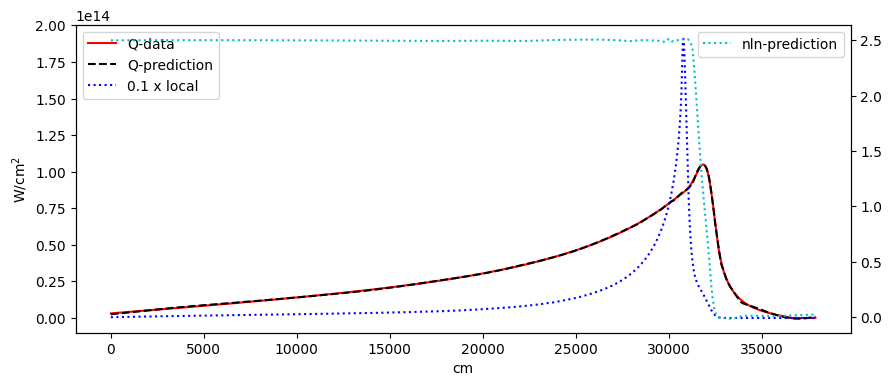

In [11]:
from matplotlib import pyplot as plt
# And finally we can see that our network has done a decent job of estimating!
fig1, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(values_Q_actual, 'r', label='Q-data')
ax1.plot(values_prediction, 'k--', label='Q-prediction')
ax1.plot(0.1 * values_local, 'b:', label='0.1 x local')
ax1.set_xlabel('cm')
ax1.set_ylabel('W/cm$^2$')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.plot(values_nln_actual, 'g:', label='nln-data')
ax2.plot(values_nln, 'c:', label='nln-prediction')
ax2.legend(loc='upper right')